In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [388]:
df = pd.read_csv('weatherHistory.csv') #the csv file must be with the notebook in the same location

In [389]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [390]:
df.shape


(96453, 12)

In [391]:
df.info()
#checking if there any null value or column type that needs change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [392]:
df_numeric=df[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
# making a dataframe from numerics only

In [393]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Wind Bearing (degrees)    96453 non-null  float64
 5   Visibility (km)           96453 non-null  float64
 6   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7)
memory usage: 5.2 MB


In [394]:
df_numeric.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [395]:
mat =df_numeric.corr()

<Axes: >

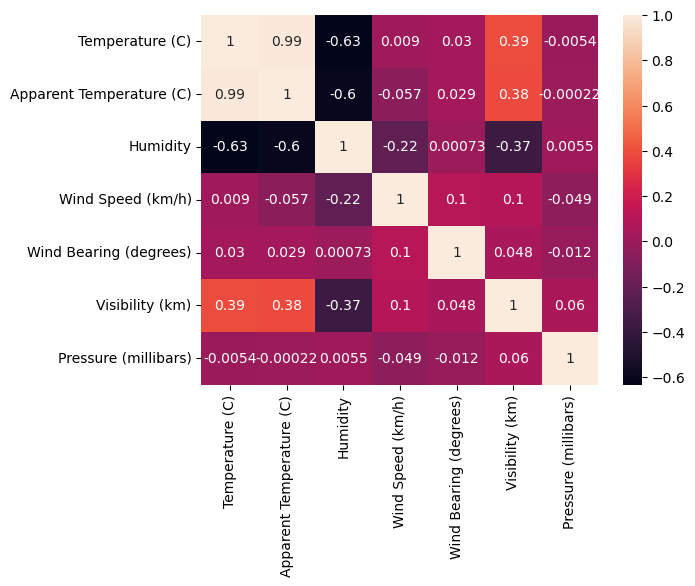

In [396]:
sns.heatmap(mat, annot= True)
# getting a first sight at relations between variables 
#How do the features relate to each other and to the weather conditions? (ans for q.2)

In [397]:
y = df_numeric['Temperature (C)']

x = df_numeric.drop(['Temperature (C)'],axis=1)



In [398]:
x


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [399]:
y


0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [400]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=.2 , random_state = 0)

In [401]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [402]:
y_pred=lr.predict(x_test)

In [403]:
y_pred

array([14.20009669, 13.45442582, 23.34958588, ...,  0.73554493,
        8.06864015, 16.27649559])

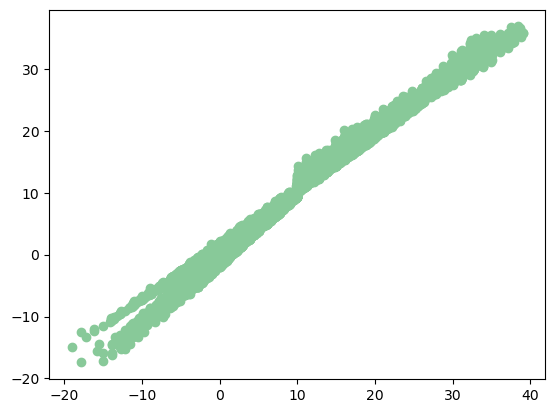

In [404]:
plt.scatter(y_test, y_pred, color = '#88c999')

In [405]:
from sklearn.metrics import r2_score 
linear_r2=r2_score (y_test,y_pred)
linear_r2

0.9900710267877918

In [406]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
lin2 = LinearRegression()
lin2.fit(x_poly, y)

LinearRegression()

In [407]:
y_pred = lin2.predict(poly.fit_transform(x_test))

In [408]:
y_pred


array([ 1.44002634e+01,  1.28572843e+01,  2.36834178e+01, ...,
       -2.08987075e-02,  7.79606017e+00,  1.61744745e+01])

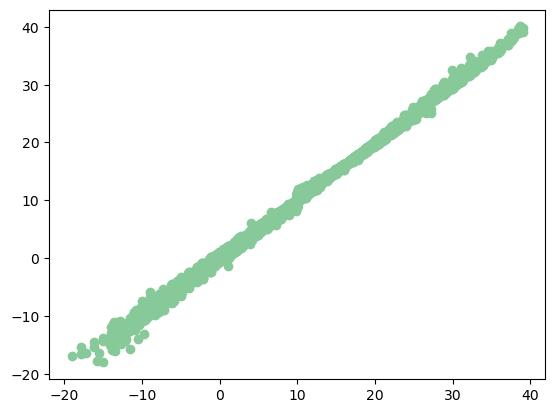

In [409]:
plt.scatter(y_test, y_pred, color = '#88c999')

In [410]:
from sklearn.metrics import r2_score 
poly_r2=r2_score (y_test,y_pred)
poly_r2


0.9983852597765314

In [411]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)

In [412]:
DTR.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [413]:
y_pred = DTR.predict(x_test)

In [414]:
y_pred

array([14.42222222, 12.15555556, 23.96111111, ..., -1.        ,
        7.32777778, 16.06111111])

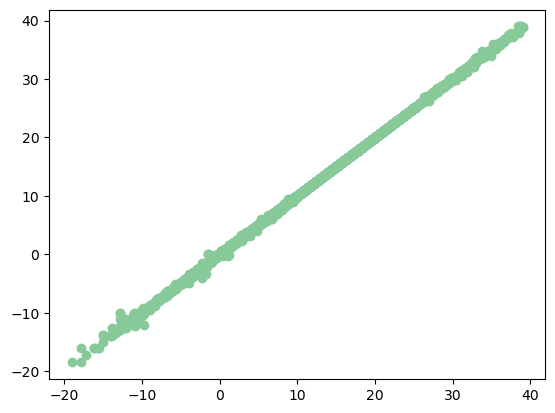

In [415]:
plt.scatter(y_test, y_pred, color = '#88c999')

In [416]:
dc_r2 = r2 = r2_score(y_test, y_pred)
dc_r2

0.9999331093835904

In [417]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=3)

In [418]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [419]:
y_pred = knn.predict(x_test)

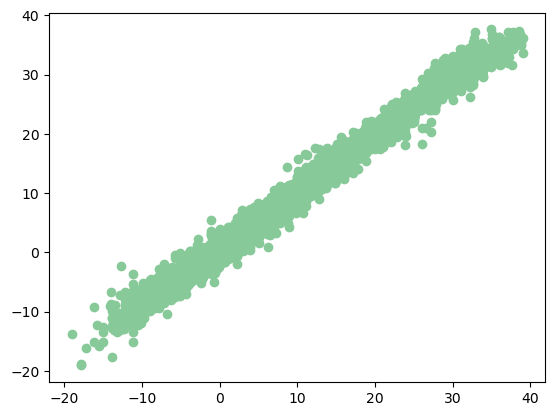

In [420]:
plt.scatter(y_test, y_pred, color = '#88c999')

In [421]:
knn_r2 =r2_score(y_test, y_pred)
knn_r2

0.9890991584228666

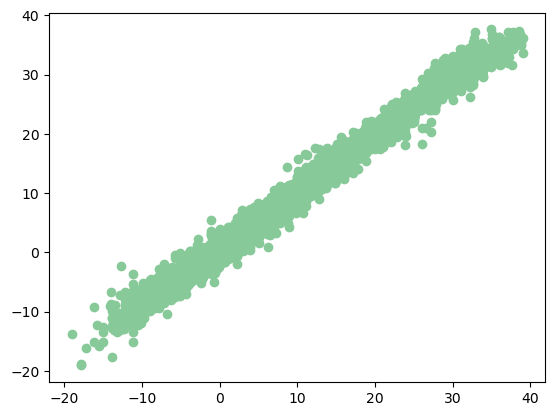

In [469]:

plt.scatter(y_test, y_pred, color = '#88c999')



In [423]:
models=['Linear Regression' , 'Poly Regression' , 'Decision Tree' , 'K Neighbors']
r2 = [linear_r2 , poly_r2 , dc_r2 , knn_r2]

([<matplotlib.axis.YTick at 0x1bda4af0260>,
 [Text(0, 0.9, '0.90'),
  Text(0, 0.92, '0.92'),
  Text(0, 0.94, '0.94'),
  Text(0, 0.96, '0.96'),
  Text(0, 0.98, '0.98'),
  Text(0, 0.99, '0.99'),
  Text(0, 1.0, '1.00')])

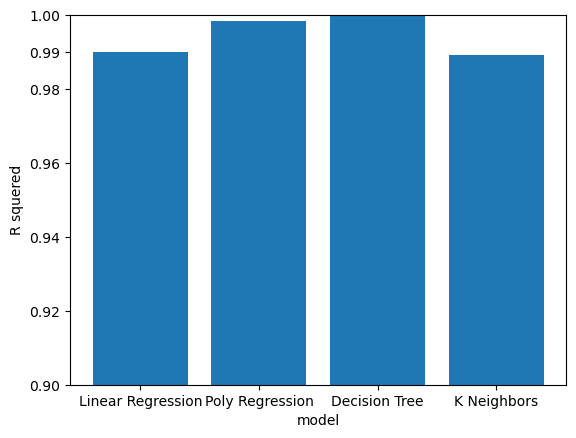

In [471]:
plt.bar(models,r2)
plt.xlabel('model')
plt.ylabel('R squered')
plt.ylim(.9, 1)  
plt.yticks([.9, .92, .94, .96, .98, .99, 1])


In [ ]:
#1. What type of machine learning problem is this?
# supervised learning regression type

In [ ]:
#3. What are the steps involved in preprocessing the dataset for machine learning?
# cleaning the data frame , selecting numerical values (we can transform other data types but it's not needed in this prob),train_test split

In [ ]:
#5. What metrics should we use to evaluate the performance of our weather prediction model?
#based on R squered value we have chosen Decision Tree Regressor